# Growth Model

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


from datetime import datetime
from fbprophet import Prophet

In [2]:
path ="c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

In [3]:
df = pd.read_csv('C://BigData/DataScience/data/08. example_wp_R.csv')
df['y'] = np.log(df['y'])

In [4]:
df['cap'] = 8.5

In [5]:
m = Prophet(growth='logistic', daily_seasonality=True)
m.fit(df);

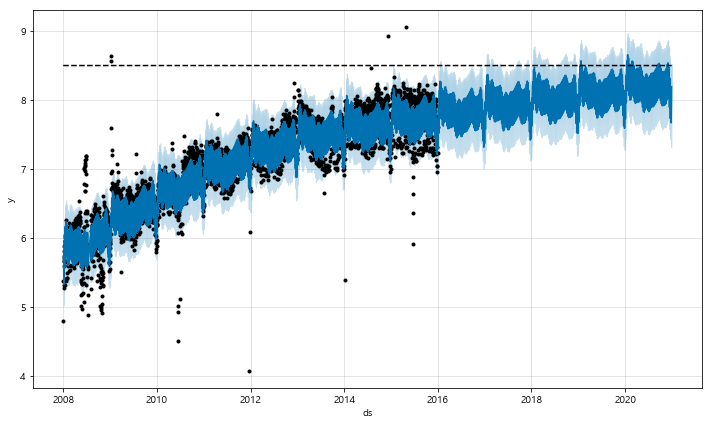

In [6]:
future = m.make_future_dataframe(periods=1826)
future['cap'] = 8.5
fcst = m.predict(future)
m.plot(fcst);

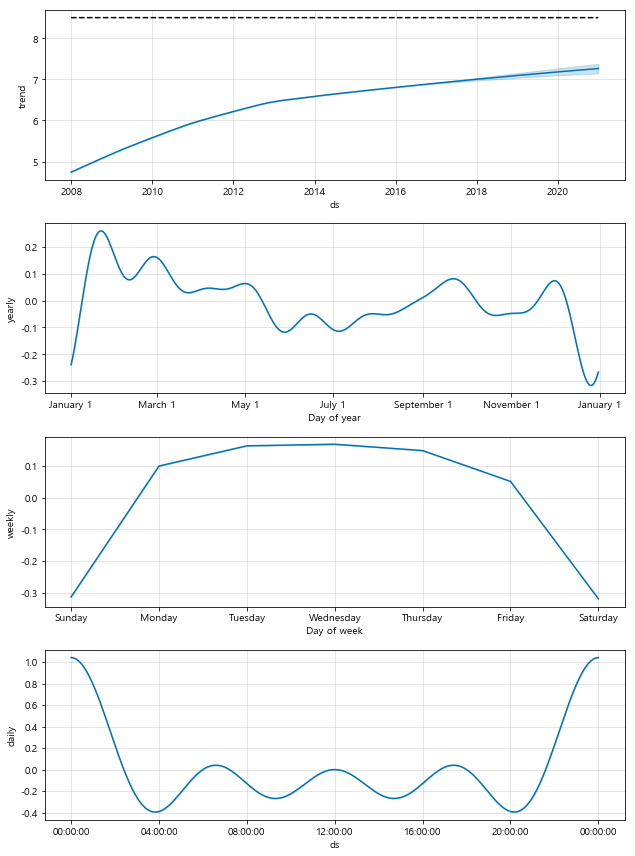

In [7]:
forecast= m.predict(future)
m.plot_components(forecast);

# Holiday Forecast

In [8]:
df = pd.read_csv("C://BigData/DataScience/data/08. example_wp_peyton_manning.csv")
df['y'] = np.log(df['y'])
m = Prophet(daily_seasonality=True)
m.fit(df);


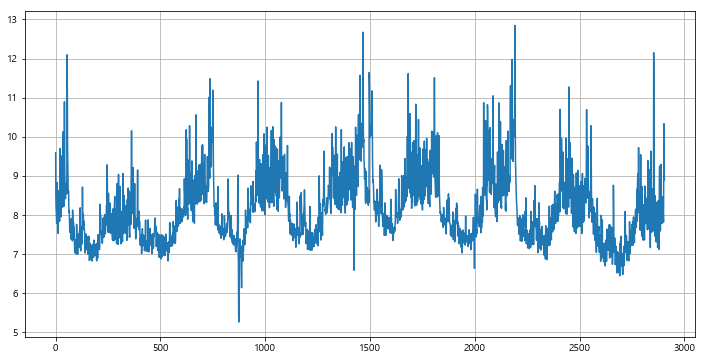

In [9]:
future=m.make_future_dataframe(periods=366)
df.y.plot(figsize=(12,6), grid=True);


In [13]:
playoffs = pd.DataFrame({
  'holiday': 'playoff',
  'ds': pd.to_datetime(['2008-01-13', '2009-01-03', '2010-01-16',
                        '2010-01-24', '2010-02-07', '2011-01-08',
                        '2013-01-12', '2014-01-12', '2014-01-19',
                        '2014-02-02', '2015-01-11', '2016-01-17',
                        '2016-01-24', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
superbowls = pd.DataFrame({
  'holiday': 'superbowl',
  'ds': pd.to_datetime(['2010-02-07', '2014-02-02', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
holidays = pd.concat((playoffs, superbowls))

In [14]:
m = Prophet(holidays=holidays, daily_seasonality=True)
forecast = m.fit(df).predict(future)

In [16]:

forecast[(forecast['playoff'] + forecast['superbowl']).abs() > 0][
        ['ds', 'playoff', 'superbowl']][-10:]

,ds,playoff,superbowl
2190,2014-02-02,1.224116,1.203719
2191,2014-02-03,1.902824,1.458890
2532,2015-01-11,1.224116,0.000000
2533,2015-01-12,1.902824,0.000000
2901,2016-01-17,1.224116,0.000000
2902,2016-01-18,1.902824,0.000000
2908,2016-01-24,1.224116,0.000000
2909,2016-01-25,1.902824,0.000000
2922,2016-02-07,1.224116,1.203719
2923,2016-02-08,1.902824,1.458890


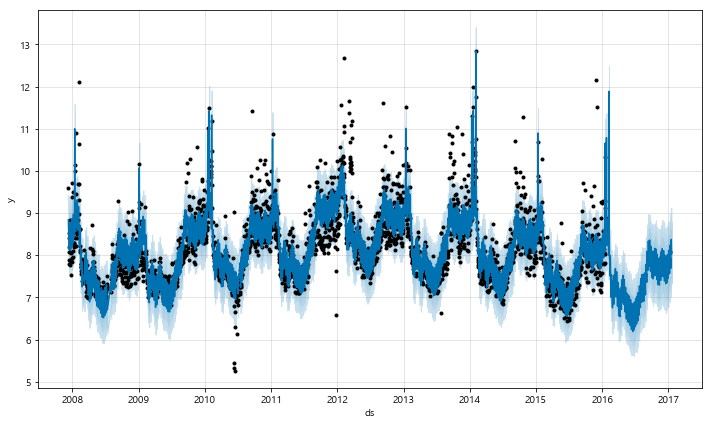

In [18]:
m.plot(forecast);

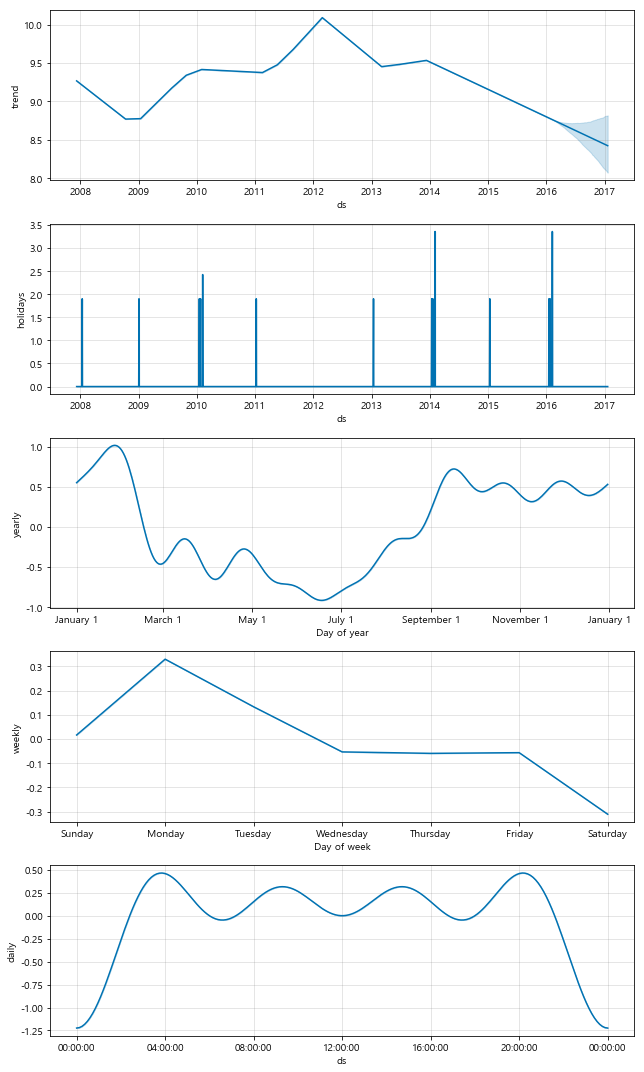

In [19]:
m.plot_components(forecast);